In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [35]:
iris = load_iris()

In [36]:
# 説明変数をXに
X = iris.data

#目的変数をYに
Y = iris.target

# 説明文です。
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris_data = DataFrame(X, columns=['Sepal Length', 'Sepal Width','Petal Length','Petal Width'])

In [8]:
iris_target = DataFrame(Y,columns=['Species'])

In [9]:
def flower(num):
    ''' 数字を受け取って、対応する名前を返します。'''
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Veriscolour'
    else:
        return 'Virginica'

iris_target['Species'] = iris_target['Species'].apply(flower)

In [10]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [11]:
iris = pd.concat([iris_data, iris_target], axis=1)

In [12]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


/Users/yamaguchishota/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/yamaguchishota/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/yamaguchishota/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/yamaguchishota/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/yamaguchishota/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/yamaguchishota/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label',

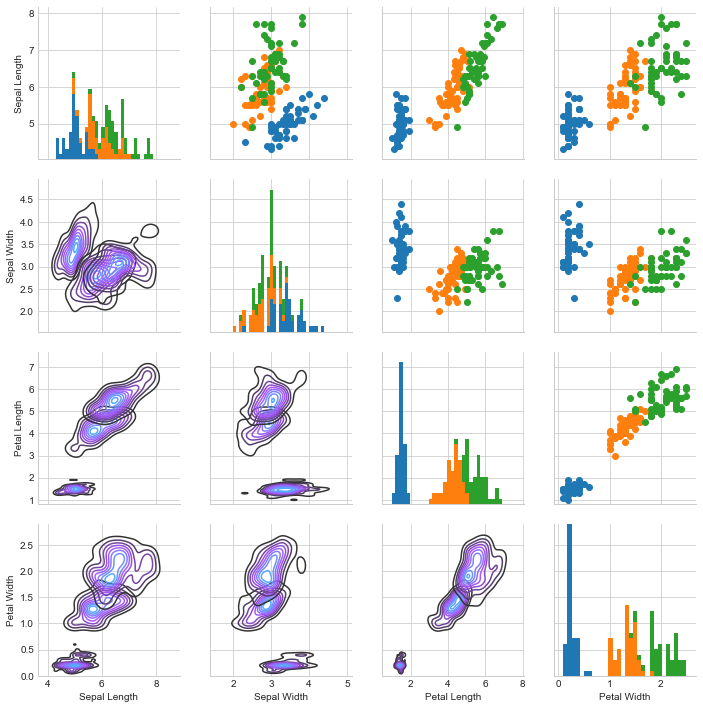

In [13]:
#pair_fig = sns.pairplot(iris, hue='Species', size=2)
pair_fig = sns.PairGrid(iris, hue='Species')
pair_fig.map_upper(plt.scatter)
pair_fig.map_lower(sns.kdeplot, cmap='cool_d')
pair_fig.map_diag(plt.hist, bins=30)

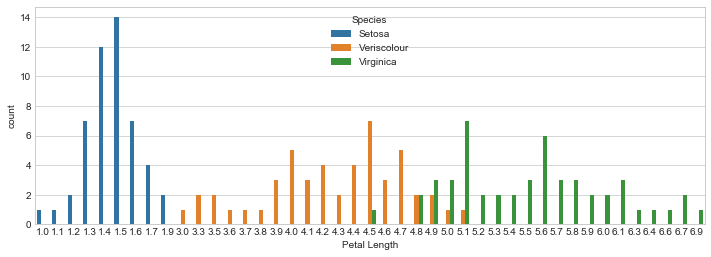

In [14]:
plt.figure(figsize=(12,4))
sns.countplot('Petal Length',data=iris,hue='Species')

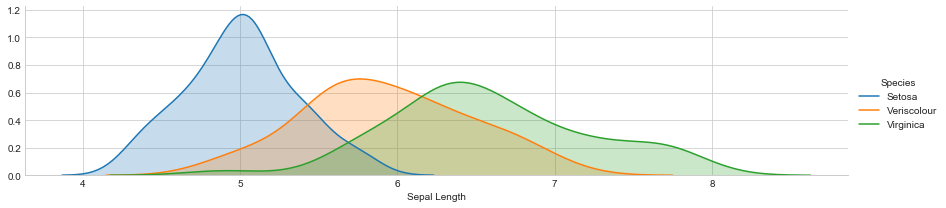

In [15]:
# 種で層別化して、グラフを少し横長に設定します。
fig = sns.FacetGrid(iris, hue="Species",aspect=4)

# mapを使って、種ごとにkdeplotを描くようにします。
fig.map(sns.kdeplot,'Sepal Length',shade= True)

# xの最大値を長老に合わせます。
# x軸の範囲を設定します。
#longest = iris['Petal Length'].max()
#fig.set(xlim=(0,longest))

# 凡例を付け加えておきましょう。
fig.add_legend()

In [16]:
y = iris['Sepal Width']
x = iris['Sepal Length']

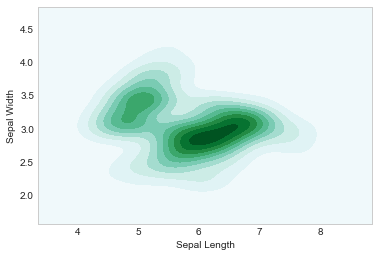

In [17]:
sns.kdeplot(y,x, shade=True)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [38]:
logreg = LogisticRegression()

In [98]:
# データを分割します。テストが全体の40%になるようにします。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=3)

In [99]:
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [100]:
# 精度を計算するのに便利なツールです。# 精度を計算す 
from sklearn import metrics

In [101]:
Y_pred = logreg.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0,
       2, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1])

In [102]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.9333333333333333


In [103]:
# K近傍法
from sklearn.neighbors import KNeighborsClassifier

In [104]:
knn = KNeighborsClassifier(n_neighbors=6)

In [105]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [106]:
Y_pred = knn.predict(X_test)

In [107]:
metrics.accuracy_score(Y_test, Y_pred)

0.95

In [108]:
# 今度はk=1です。
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train,Y_train)

Y_pred = knn.predict(X_test)

print(metrics.accuracy_score(Y_test,Y_pred))

0.9666666666666667


In [109]:
# kを変化させてみましょう。
k_range = range(1, 90)

accuracy = []

In [110]:
# 先ほどの計算を繰り返して見ましょう。
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

Text(0,0.5,'Testing Accuracy')

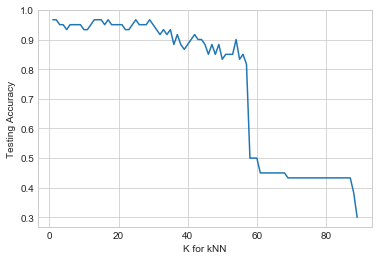

In [111]:
plt.plot(k_range, accuracy)
plt.xlabel('K for kNN')
plt.ylabel('Testing Accuracy')